In [ ]:
df = pd.read(x)

In [279]:
def isnull(x):
    from string import ascii_letters
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    #Check a dataframe for nulls
    df = pd.read_csv(x)
    print(df.isna().sum())
    
    #Plot null values in dataframe
    ax = plt.axes()
#     plt.figure(figsize=(20, 16))
    nanplot = sns.heatmap(df.isnull(), cbar=False, cmap="PiYG", vmin=-0.45, vmax=0.65, ax = ax)
    ax.set_title('NaN Values in Dataframe')
    fig1 = nanplot.get_figure()
    fig1.savefig('PlotOfNaNinDF')

    sns.set(style="white")
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(13, 11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    fig2 = plot.get_figure()
    #save
    fig2.savefig('correlation_matrix')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


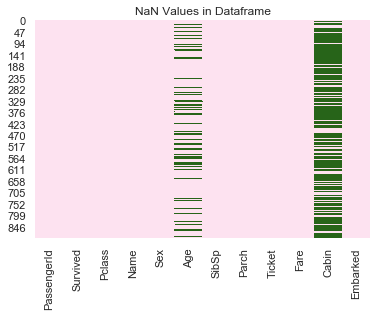

<Figure size 1440x1152 with 0 Axes>

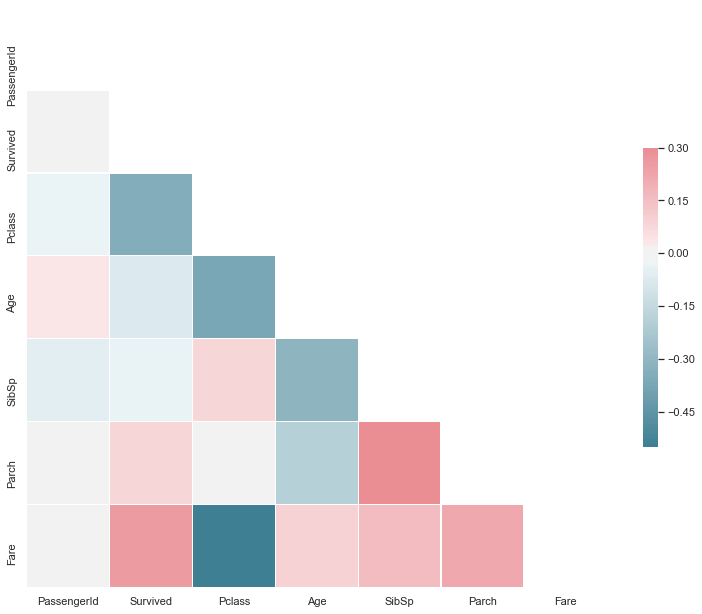

In [157]:
x = 'train.csv'
isnull(x)

In [198]:
def GenerateMoreData(X):
    X = X.copy()
    
    #replace NaN's with 0's
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(0)
    

In [199]:
import category_encoders as ce
encoder = ce.OrdinalEncoder


In [278]:
import pandas as pd
import numpy as np
import category_encoders as ce
df = pd.read_csv('train.csv')
# df = df.fillna(0, inplace=True)
# X = df.select_dtypes(exclude=['float,int64,int32'])
X = df.select_dtypes(exclude = ['number'])
# X.head(2)
# encoder.transform(de)
# encoder.fit(X)
# y = X.iloc[:,:1]
# X= X.drop(X.iloc[:,:1].head(0).columns, axis=1)
encoder = ce.OrdinalEncoder()
# encoder.fit(X,y)
# encoder.fit(X,y)
Xc = encoder.fit_transform(X)
Xc

,Name,Sex,Ticket,Cabin,Embarked
0,1,1,1,1,1
1,2,2,2,2,2
2,3,2,3,1,1
3,4,2,4,3,1
4,5,1,5,1,1
5,6,1,6,1,3
6,7,1,7,4,1
7,8,1,8,1,1
8,9,2,9,1,1
9,10,2,10,1,2


In [227]:
list(df.columns) 

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [228]:
data_columns = df.columns
num_df = (df
          .drop(data_columns, axis=1)
          .join(df[data_columns].apply(pd.to_numeric, errors='coerce')))

# num_df[num_df[df].notnull().all(axis=1)]

In [232]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [231]:
num_df.fillna(0, inplace = True)
num_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22.0,1,0,0.0,7.2500,0.0,0.0
1,2,1,1,0.0,0.0,38.0,1,0,0.0,71.2833,0.0,0.0
